<a href="https://colab.research.google.com/github/vishumestha/Python-Machine-Learning/blob/master/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Boosting Techniques**

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Boosting sklearn library
import xgboost
!pip install catboost
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [72]:
#Loading the training data
df_train=pd.read_csv("https://raw.githubusercontent.com/vishumestha/Python-Machine-Learning/master/Projects/Imbalanced%20Data%20set%20Projects/train.csv")
#Loading test_data
df_test=pd.read_csv("https://raw.githubusercontent.com/vishumestha/Python-Machine-Learning/master/Projects/Imbalanced%20Data%20set%20Projects/test.csv")
df_train['train_test']='train'
df_test['train_test']='test'

#Checking the shape of the train and test dataset
print("train.shape",df_train.shape)
print("test.shape",df_test.shape) 

#Check the columns of the train and test
print("train_columns",(df_train.columns))
print("test_columns",list(df_test.columns))

#Check the columns missing in either of the data set
diff_train=list(set(df_train.columns)-set(df_test.columns))
diff_test=list(set(df_test.columns)-set(df_train.columns))
print("diff_train",diff_train)
print("diff_test",diff_test)

#combining training and testing data
df_train_test=pd.concat([df_train,df_test])  
print("After combining training and testing data",df_train_test.train_test.value_counts())


df_train['income_level']=df_train['income_level'].map({-50000:0,50000:1})
df_test['income_level']=df_test['income_level'].map({'-50000':0, ' 50000+.':1})

train.shape (199523, 42)
test.shape (99762, 42)
train_columns Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 

Finding the categorical and Numerical variables, and Converting them

In [73]:
#cat and num features
num_col=df_train_test.loc[:,df_train_test.dtypes !='object'].columns
cat_col=df_train_test.loc[:,df_train_test.dtypes =='object'].columns

#Checking the unique values
for x in num_col:
  print(x,df_train[x].unique())
  
#convert the features to cat
conv_cat=["age","industry_code","occupation_code","num_person_Worked_employer","business_or_self_employed","veterans_benefits","weeks_worked_in_year","year"]
for x_cat in conv_cat:
  df_train_test[x_cat]=df_train_test[x_cat].astype(str)
  df_train[x_cat]=df_train[x_cat].astype(str)
  df_test[x_cat]=df_test[x_cat].astype(str)
  
 #cat and num features
num_col=df_train_test.loc[:,df_train_test.dtypes !='object'].columns
cat_col=df_train_test.loc[:,df_train_test.dtypes =='object'].columns

age [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
industry_code [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
occupation_code [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
wage_per_hour [   0 1200  876 ... 3156 2188 1092]
capital_gains [    0  5178   991  2829  3464  5556  7298 15024  1831  3137 10605 20051
  2538  3908  2407  2050  3103  1086  7688  5013  4386  2414 99999 13550
  2174  4650  4064   914  2354  4787  2009  2597  1055  6097  2635  2105
  3325  6767  2228  2062  3942 27828  9562  2176  7262  2202  2290  1173
  8614  2329  2653  7430  34

Exploring Numerical features

Index(['wage_per_hour', 'capital_gains', 'capital_losses',
       'dividend_from_Stocks'],
      dtype='object')


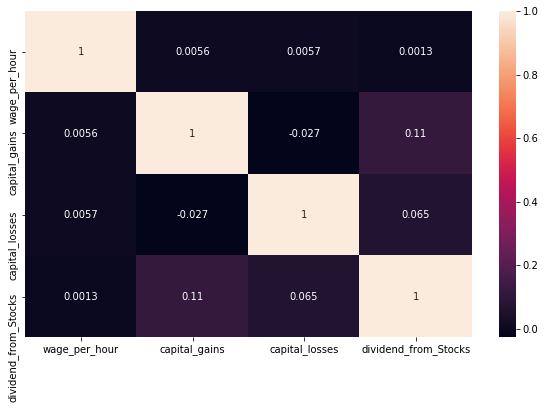

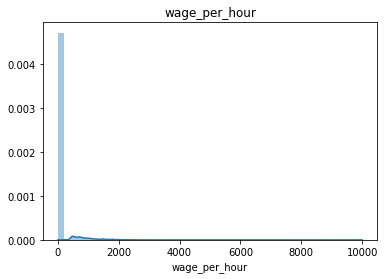

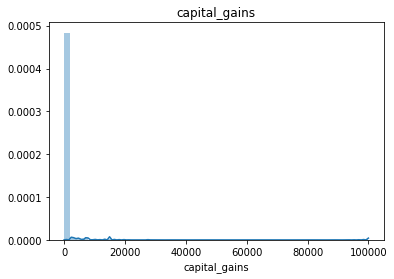

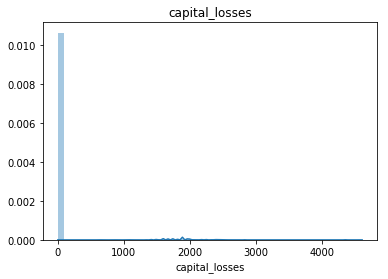

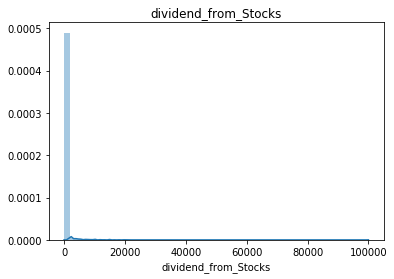

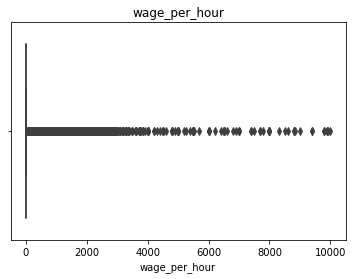

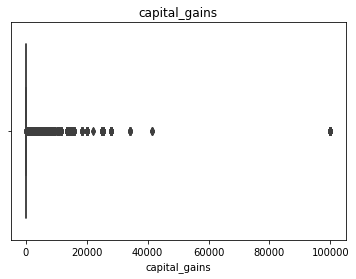

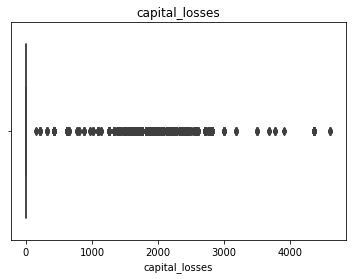

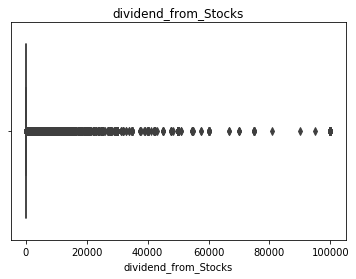

In [6]:
print(num_col)
corr=df_train[num_col].corr(method ='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot=True)
plt.show()
corr
#Finding the distribution
for col in num_col:
  plt.figure()
  sns.distplot(df_train_test[col])
  plt.title(col)
  
for col in num_col:
  plt.figure()
  sns.boxplot(df_train_test[col])
  plt.title(col)

Exploring Categorical Variables

--------------------------------------
age
34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
2     3236
7     3218
30    3203
32    3188
8     3187
6     3171
9     3162
13    3152
39    3144
1     3138
10    3134
41    3134
11    3128
40    3114
14    3068
12    3060
29    3050
28    3013
42    2995
15    2926
      ... 
60    1560
65    1550
62    1531
63    1501
61    1497
67    1496
66    1443
68    1436
71    1418
69    1412
70    1410
73    1354
72    1315
74    1227
75    1065
76    1050
77     979
78     876
79     811
80     799
90     725
81     720
82     615
83     561
84     519
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64
Not Supported
--------------------------------------
class_of_worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government 

<Figure size 432x288 with 0 Axes>

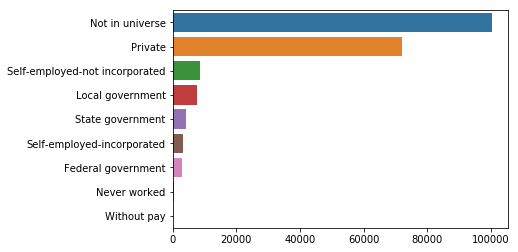

--------------------------------------
industry_code
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: industry_code, dtype: int64
Not Supported
--------------------------------------
occupation_code
0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

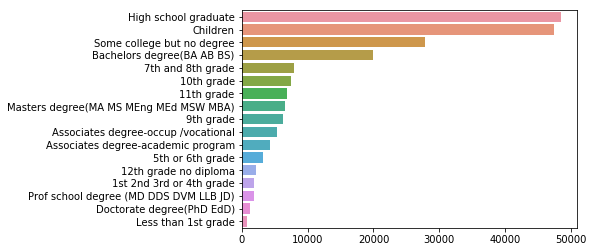

--------------------------------------
enrolled_in_edu_inst_lastwk
Not in universe          186943
High school                6892
College or university      5688
Name: enrolled_in_edu_inst_lastwk, dtype: int64


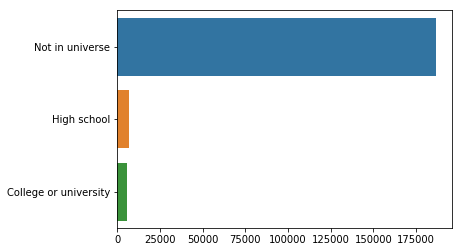

--------------------------------------
marital_status
Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Married-spouse absent               1518
Married-A F spouse present           665
Name: marital_status, dtype: int64


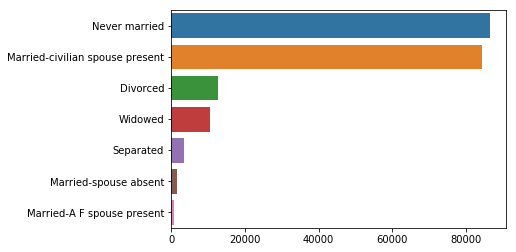

--------------------------------------
major_industry_code
Not in universe or children            100684
Retail trade                            17070
Manufacturing-durable goods              9015
Education                                8283
Manufacturing-nondurable goods           6897
Finance insurance and real estate        6145
Construction                             5984
Business and repair services             5651
Medical except hospital                  4683
Public administration                    4610
Other professional services              4482
Transportation                           4209
Hospital services                        3964
Wholesale trade                          3596
Agriculture                              3023
Personal services except private HH      2937
Social services                          2549
Entertainment                            1651
Communications                           1181
Utilities and sanitary services          1178
Private household ser

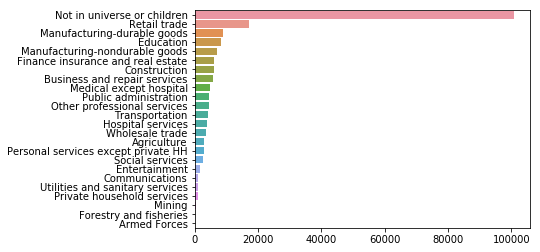

--------------------------------------
major_occupation_code
Not in universe                          100684
Adm support including clerical            14837
Professional specialty                    13940
Executive admin and managerial            12495
Other service                             12099
Sales                                     11783
Precision production craft & repair       10518
Machine operators assmblrs & inspctrs      6379
Handlers equip cleaners etc                4127
Transportation and material moving         4020
Farming forestry and fishing               3146
Technicians and related support            3018
Protective services                        1661
Private household services                  780
Armed Forces                                 36
Name: major_occupation_code, dtype: int64


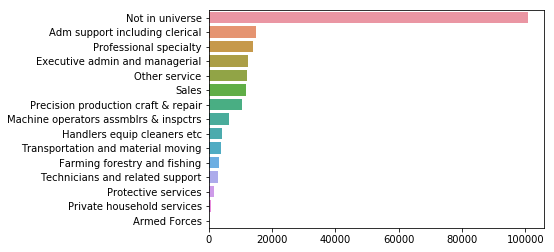

--------------------------------------
race
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64


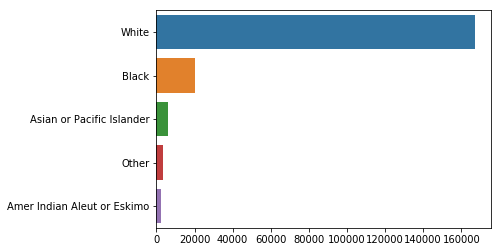

--------------------------------------
hispanic_origin
All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64


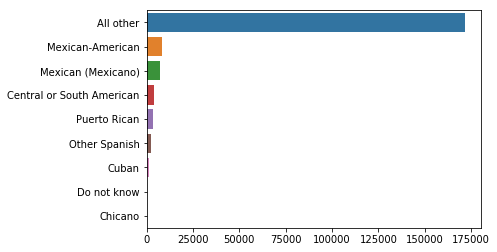

--------------------------------------
sex
Female    103984
Male       95539
Name: sex, dtype: int64


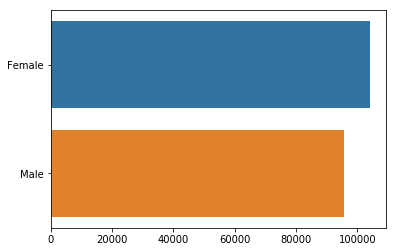

--------------------------------------
member_of_labor_union
Not in universe    180459
No                  16034
Yes                  3030
Name: member_of_labor_union, dtype: int64


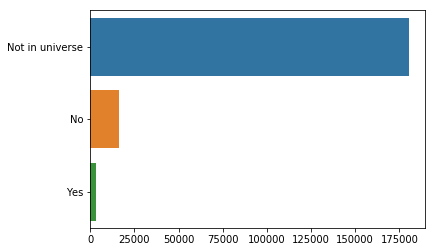

--------------------------------------
reason_for_unemployment
Not in universe          193453
Other job loser            2038
Re-entrant                 2019
Job loser - on layoff       976
Job leaver                  598
New entrant                 439
Name: reason_for_unemployment, dtype: int64


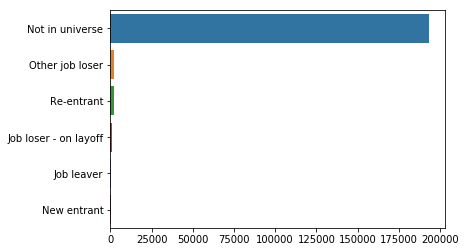

--------------------------------------
full_parttime_employment_stat
Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: full_parttime_employment_stat, dtype: int64


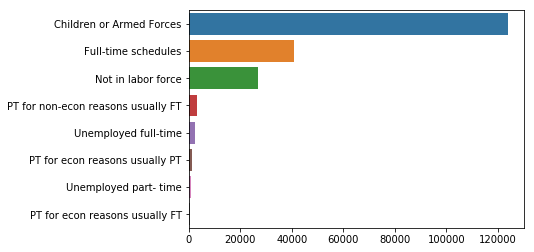

--------------------------------------
tax_filer_status
Nonfiler                        75094
Joint both under 65             67383
Single                          37421
Joint both 65+                   8332
Head of household                7426
Joint one under 65 & one 65+     3867
Name: tax_filer_status, dtype: int64


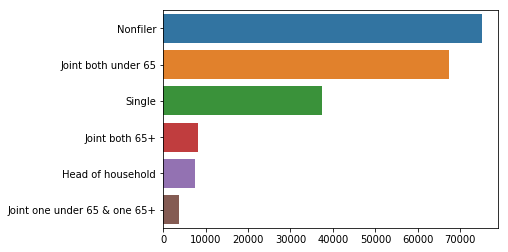

--------------------------------------
region_of_previous_residence
Not in universe    183750
South                4889
West                 4074
Midwest              3575
Northeast            2705
Abroad                530
Name: region_of_previous_residence, dtype: int64


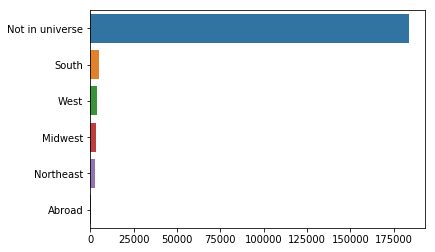

--------------------------------------
state_of_previous_residence
Not in universe         183750
California                1714
Utah                      1063
Florida                    849
North Carolina             812
Abroad                     671
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Lou

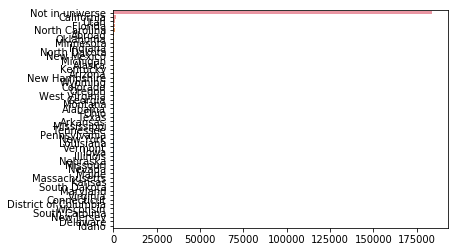

--------------------------------------
d_household_family_stat
Householder                                        53248
Child <18 never marr not in subfamily              50326
Spouse of householder                              41695
Nonfamily householder                              22213
Child 18+ never marr Not in a subfamily            12030
Secondary individual                                6122
Other Rel 18+ ever marr not in subfamily            1956
Grandchild <18 never marr child of subfamily RP     1868
Other Rel 18+ never marr not in subfamily           1728
Grandchild <18 never marr not in subfamily          1066
Child 18+ ever marr Not in a subfamily              1013
Child under 18 of RP of unrel subfamily              732
RP of unrelated subfamily                            685
Child 18+ ever marr RP of subfamily                  671
Other Rel <18 never marr child of subfamily RP       656
Other Rel 18+ ever marr RP of subfamily              656
Other Rel 18+ spouse of s

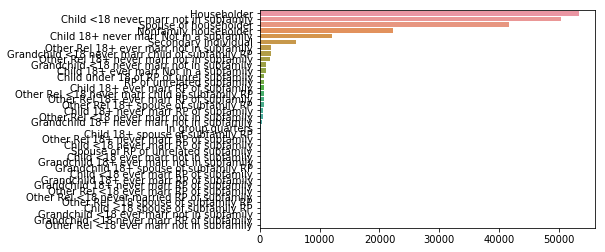

--------------------------------------
d_household_summary
Householder                             75475
Child under 18 never married            50426
Spouse of householder                   41709
Child 18 or older                       14430
Other relative of householder            9703
Nonrelative of householder               7601
Group Quarters- Secondary individual      132
Child under 18 ever married                47
Name: d_household_summary, dtype: int64


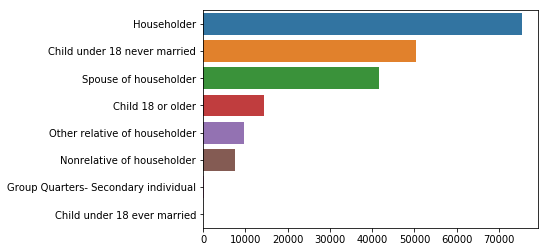

--------------------------------------
migration_msa
Nonmover            82538
MSA to MSA          10601
NonMSA to nonMSA     2811
Not in universe      1516
MSA to nonMSA         790
NonMSA to MSA         615
Abroad to MSA         453
Not identifiable      430
Abroad to nonMSA       73
Name: migration_msa, dtype: int64


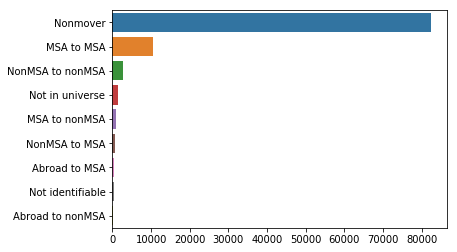

--------------------------------------
migration_reg
Nonmover                          82538
Same county                        9812
Different county same state        2797
Not in universe                    1516
Different region                   1178
Different state same division       991
Abroad                              530
Different division same region      465
Name: migration_reg, dtype: int64


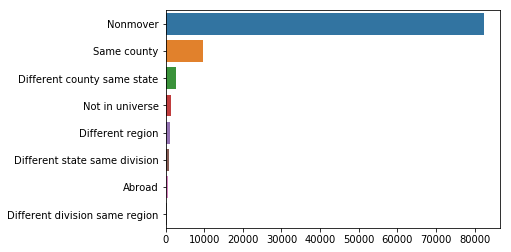

--------------------------------------
migration_within_reg
Nonmover                        82538
Same county                      9812
Different county same state      2797
Not in universe                  1516
Different state in South          973
Different state in West           679
Different state in Midwest        551
Abroad                            530
Different state in Northeast      431
Name: migration_within_reg, dtype: int64


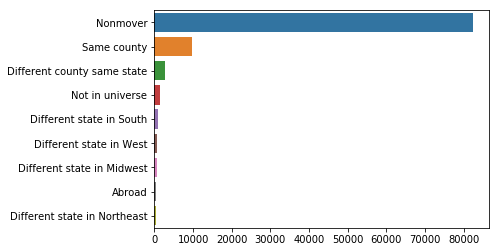

--------------------------------------
live_1_year_ago
Not in universe under 1 year old    101212
Yes                                  82538
No                                   15773
Name: live_1_year_ago, dtype: int64


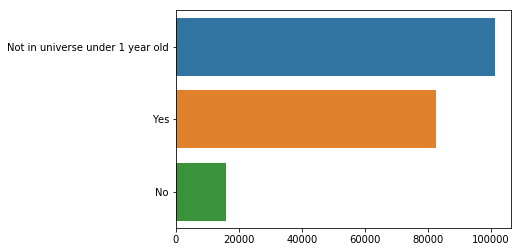

--------------------------------------
migration_sunbelt
Not in universe    84054
No                  9987
Yes                 5786
Name: migration_sunbelt, dtype: int64


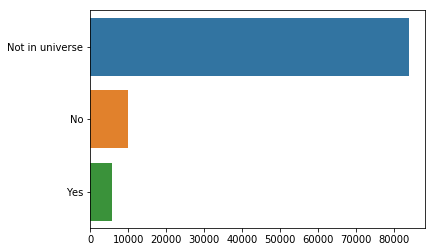

--------------------------------------
num_person_Worked_employer
0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: num_person_Worked_employer, dtype: int64
Not Supported
--------------------------------------
family_members_under_18
Not in universe           144232
Both parents present       38983
Mother only present        12772
Father only present         1883
Neither parent present      1653
Name: family_members_under_18, dtype: int64


<Figure size 432x288 with 0 Axes>

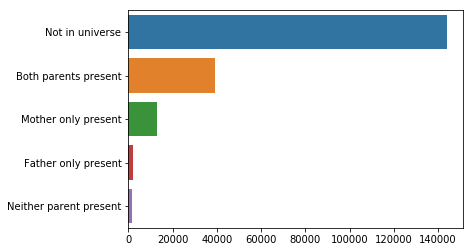

--------------------------------------
country_father
United-States                   159163
Mexico                           10008
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica                            463
Vietnam                            457
Guatemala                          445
Japan                              392
Portugal                           388
Ecuador                            379
Haiti                              351
Greece    

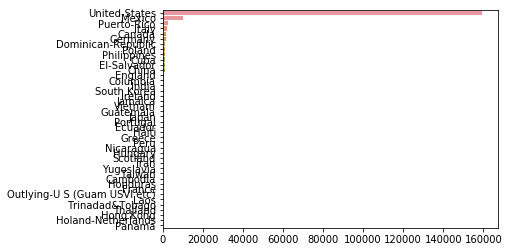

--------------------------------------
country_mother
United-States                   160479
Mexico                            9781
Puerto-Rico                       2473
Italy                             1844
Canada                            1451
Germany                           1382
Philippines                       1231
Poland                            1110
Cuba                              1108
El-Salvador                       1108
Dominican-Republic                1103
England                            903
China                              760
Columbia                           612
South Korea                        609
Ireland                            599
India                              581
Vietnam                            473
Japan                              469
Jamaica                            453
Guatemala                          444
Ecuador                            375
Peru                               355
Haiti                              353
Portugal  

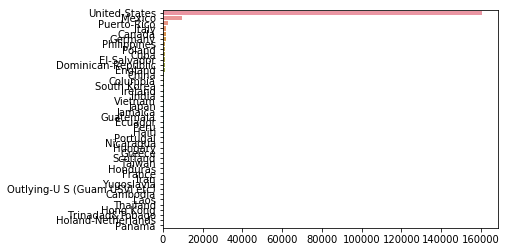

--------------------------------------
country_self
United-States                   176989
Mexico                            5767
Puerto-Rico                       1400
Germany                            851
Philippines                        845
Cuba                               837
Canada                             700
Dominican-Republic                 690
El-Salvador                        689
China                              478
South Korea                        471
England                            457
Columbia                           434
Italy                              419
India                              408
Vietnam                            391
Poland                             381
Guatemala                          344
Japan                              339
Jamaica                            320
Peru                               268
Ecuador                            258
Haiti                              228
Nicaragua                          218
Taiwan      

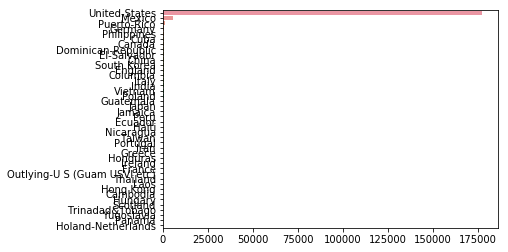

--------------------------------------
citizenship
Native- Born in the United States              176992
Foreign born- Not a citizen of U S              13401
Foreign born- U S citizen by naturalization      5855
Native- Born abroad of American Parent(s)        1756
Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64


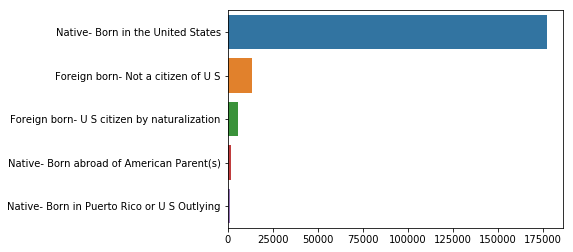

--------------------------------------
business_or_self_employed
0    180672
2     16153
1      2698
Name: business_or_self_employed, dtype: int64
Not Supported
--------------------------------------
fill_questionnaire_veteran_admin
Not in universe    197539
No                   1593
Yes                   391
Name: fill_questionnaire_veteran_admin, dtype: int64


<Figure size 432x288 with 0 Axes>

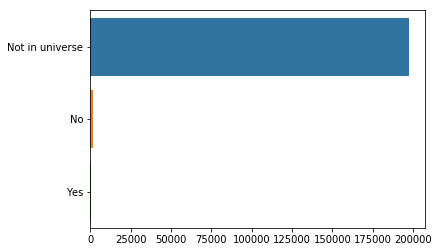

--------------------------------------
veterans_benefits
2    150130
0     47409
1      1984
Name: veterans_benefits, dtype: int64
Not Supported
--------------------------------------
weeks_worked_in_year
0     95983
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
36     1108
16      945
32      883
44      845
51      819
24      767
4       757
46      708
35      704
10      694
45      669
6       646
39      602
42      573
28      568
49      509
13      496
1       464
2       458
25      457
3       417
38      380
43      374
22      370
15      353
17      331
5       309
47      278
18      272
14      257
9       239
34      230
7       152
21      135
37      123
41       88
33       81
11       78
27       76
23       67
29       63
31       51
19       48
Name: weeks_worked_in_year, dtype: int64
Not Supported
--------------------------------------
year
94    99827
95    99696
Name: year, dtype: int64
Not Support

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

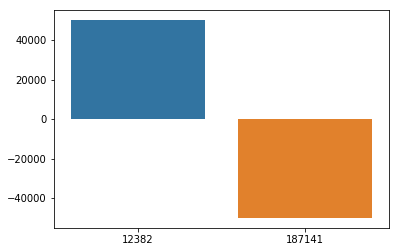

--------------------------------------
train_test
train    199523
Name: train_test, dtype: int64


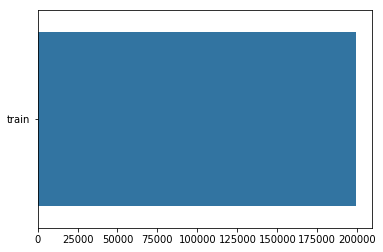

In [7]:
#Exploring Categorical Variables
for x in cat_col:
  print("--------------------------------------")
  print("{}".format(x))
  print(df_train[x].value_counts())
  try:
    plt.figure()
    sns.barplot(df_train[x].value_counts().values,df_train[x].value_counts().index)
    plt.show()
  except:
    print("Not Supported")

In [86]:
df_train.dropna(axis=0,inplace=True)
y=df_train['income_level']
X=df_train.drop(['income_level','train_test'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)
import numpy as np
categorical_features_indices = np.where(X.dtypes == object)[0]
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1,loss_function = "Logloss",class_weights=[0.1,1])
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6294431	test: 0.6296198	best: 0.6296198 (0)	total: 362ms	remaining: 35.8s
1:	learn: 0.5723879	test: 0.5723455	best: 0.5723455 (1)	total: 714ms	remaining: 35s
2:	learn: 0.5281252	test: 0.5274790	best: 0.5274790 (2)	total: 1.04s	remaining: 33.6s
3:	learn: 0.4955209	test: 0.4950134	best: 0.4950134 (3)	total: 1.35s	remaining: 32.4s
4:	learn: 0.4690518	test: 0.4679357	best: 0.4679357 (4)	total: 1.7s	remaining: 32.3s
5:	learn: 0.4488064	test: 0.4476160	best: 0.4476160 (5)	total: 2.03s	remaining: 31.8s
6:	learn: 0.4294377	test: 0.4279782	best: 0.4279782 (6)	total: 2.36s	remaining: 31.4s
7:	learn: 0.4145364	test: 0.4127919	best: 0.4127919 (7)	total: 2.7s	remaining: 31.1s
8:	learn: 0.4005491	test: 0.3986060	best: 0.3986060 (8)	total: 3.01s	remaining: 30.4s
9:	learn: 0.3896095	test: 0.3875033	best: 0.3875033 (9)	total: 3.34s	remaining: 30.1s
10:	learn: 0.3826251	test: 0.3803322	best: 0.3803322 (10)	total: 3.65s	remaining: 29.6s
11:	learn: 0.3745058	test: 0.3721314	best: 0.3721314 (11

In [0]:
df_test.dropna(axis=0,inplace=True)
y_test=df_test['income_level']
test=df_test.drop(['income_level','train_test'],axis=1)
y_predict=model.predict(test)

**Model Evaluation**

In [89]:
from sklearn.metrics import accuracy_score,auc,roc_auc_score,f1_score,confusion_matrix,classification_report
classification_report(y_test,y_predict)
confusion_matrix(y_test,y_predict)

accuracy_score(y_test,y_predict)
#f1_score(y_test,y_predict)

0.9442573324512339

In [41]:
categorical_features_indices

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39])

In [70]:
df_trai['income_level'].value_counts()

NameError: ignored

In [78]:
df_train['income_level'].value_counts()

0    89020
1     5442
Name: income_level, dtype: int64

In [79]:
5442/89020

0.06113232981352505